In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
# Set random seed for reproducibility
np.random.seed(1)
torch.manual_seed(1)

# Generate data
n_samples = 20000
y = np.random.uniform(-.5, 2.5, n_samples)
X = y.reshape(-1, 1)
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5) or (1.5 < y[i] < 2):
        xtrue[i] = 0
    else:
        xtrue[i] = np.random.normal(0, scale=0.5 + 1 * abs(np.sin(np.pi * y[i])))

# Generate x and s
x = xtrue + np.random.normal(0, 1, len(xtrue))

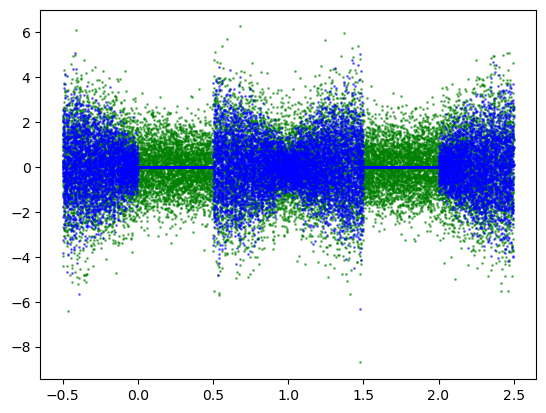

In [2]:
plt.scatter(y, x , alpha=0.5, s=1, label='Nosiy', color='green')
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')